In [27]:
import numpy as np
%pylab inline
import astropy.units as u
import biff
from pygadgetreader import *
from octopus import profiles
from octopus import leapfrog
from astropy import constants
import galpy.potential
import galpy.orbit as Orbit
import galpy

Populating the interactive namespace from numpy and matplotlib


In [28]:
G1 = constants.G
G1 = G1.to(u.kpc**3/(u.Msun * u.Gyr**2))
print G1

4.49975332435e-06 kpc3 / (Gyr2 solMass)


In [3]:
G_c = constants.G
G_c = G_c.to(u.kiloparsec**3 / (u.s**2 * u.Msun)) # 
print G_c

4.51835939627e-39 kpc3 / (s2 solMass)


In [29]:
font = {'size':16, 'family':'serif'}
plt.matplotlib.rc('font', **font)

In [5]:
MW = readsnap('../data/MW_models/pm/MWN2vir_000.hdf5', 'pos', 'dm')
MW_mass = readsnap('../data/MW_models/pm/MWN2vir_000.hdf5', 'mass', 'dm')
MW_pot = readsnap('../data/MW_models/pm/MWN2vir_000.hdf5', 'pot', 'dm')

Returning DM    Positions
Returning DM    Mass
Returning DM    Potential


In [6]:
trunc1 = np.where(np.sqrt((MW[:,0])**2.0 + (MW[:,1])**2.0 + (MW[:,2])**2.0)<500)[0]

In [7]:
MW_t = MW[trunc1]
MW_mass_t = MW_mass[trunc1]
MW_pot_t = MW_pot[trunc1]


In [8]:
## Code taken from (https://github.com/adrn/biff/blob/master/notebooks/Plummer%20test.ipynb)
def STnlm(xyz, mass, rs, n_max, l_max):
    nmax = n_max
    lmax = l_max

    Snlm = np.zeros((nmax+1,lmax+1,lmax+1))
    Tnlm = np.zeros((nmax+1,lmax+1,lmax+1))

    nlms = []

    for n in range(nmax+1):
        for l in range(lmax+1):
            for m in range(l+1):
                nlms.append([n,l,m])

    for nlm in nlms:
        n,l,m = nlm
        S,T = biff.compute_coeffs_discrete(np.double(xyz), np.double(mass/100.0), nlm, rs)
        Snlm[n,l,m] = S
        Tnlm[n,l,m] = T
    return Snlm, Tnlm, nlms

In [18]:
SMW1, TMW1, nlmsMW1 = STnlm(MW_t, MW_mass_t, 40.85, 1, 0)
MWbfe_pot = biff.potential(np.ascontiguousarray(np.double(MW_t)), SMW1, TMW1, 1, 0, G_c.value, 1.55E12, 40.85)
MWbfe_rho = biff.density(np.ascontiguousarray(np.double(MW_t)), SMW1, TMW1, 1, 0, 1.55E12, 40.85)

In [19]:
SMW2, TMW2, nlmsMW2 = STnlm(MW_t, MW_mass_t, 40.85, 10, 0)
#MWbfe_pot = biff.potential(np.ascontiguousarray(np.double(MW_t)), SMW1, TMW1, 1, 0, G_c.value, 1.55E12, 40.85)
#MWbfe_rho = biff.density(np.ascontiguousarray(np.double(MW_t)), SMW1, TMW1, 1, 0, 1.55E12, 40.85)

In [20]:
t_hex1, x_hex1, y_hex1, z_hex1, vx_hex1, vy_hex1, vz_hex1 = leapfrog.integrate_biff(0, 10, 0, 161, 0, 0, 2, SMW1, TMW1, 1, 0, G1.value, 1.55E12, 40.85)
t_hex2, x_hex2, y_hex2, z_hex2, vx_hex2, vy_hex2, vz_hex2 = leapfrog.integrate_biff(0, 20, 0, 190, 0, 0, 2, SMW1, TMW1, 1, 0, G1.value, 1.55E12, 40.85)
t_hex3, x_hex3, y_hex3, z_hex3, vx_hex3, vy_hex3, vz_hex3 = leapfrog.integrate_biff(0, 50, 0, 201, 0, 0, 3, SMW1, TMW1, 1, 0, G1.value, 1.55E12, 40.85)
t_hex4, x_hex4, y_hex4, z_hex4, vx_hex4, vy_hex4, vz_hex4 = leapfrog.integrate_biff(0, 100, 0, 184, 0, 0, 4, SMW1, TMW1, 1, 0, G1.value, 1.55E12, 40.85)
t_hex5, x_hex5, y_hex5, z_hex5, vx_hex5, vy_hex5, vz_hex5 = leapfrog.integrate_biff(0, 200, 0, 152, 0, 0, 4, SMW1, TMW1, 1, 0, G1.value, 1.55E12, 40.85)
t_hex6, x_hex6, y_hex6, z_hex6, vx_hex6, vy_hex6, vz_hex6 = leapfrog.integrate_biff(0, 400, 0, 117, 0, 0, 4, SMW1, TMW1, 1, 0, G1.value, 1.55E12, 40.85)

In [21]:
t_hern1, x_hern1, y_hern1, z_hern1, vx_hern1, vy_hern1, vz_hern1 = leapfrog.integrate_hern(0, 10, 0, 161, 0, 0, 2, 1.55E12, 40.85)

In [22]:
t_hern2, x_hern2, y_hern2, z_hern2, vx_hern2, vy_hern2, vz_hern2 = leapfrog.integrate_hern(0, 20, 0, 190, 0, 0, 2, 1.55E12, 40.85)

In [23]:
t_hern3, x_hern3, y_hern3, z_hern3, vx_hern3, vy_hern3, vz_hern3 = leapfrog.integrate_hern(0, 50, 0, 201, 0, 0, 3, 1.55E12, 40.85)

In [24]:
t_hern4, x_hern4, y_hern4, z_hern4, vx_hern4, vy_hern4, vz_hern4 = leapfrog.integrate_hern(0, 100, 0, 184, 0, 0, 4, 1.55E12, 40.85)

In [25]:
t_hern5, x_hern5, y_hern5, z_hern5, vx_hern5, vy_hern5, vz_hern5 = leapfrog.integrate_hern(0, 200, 0, 152, 0, 0, 4, 1.55E12, 40.85)

In [49]:
t_hern6, x_hern6, y_hern6, z_hern6, vx_hern6, vy_hern6, vz_hern6 = leapfrog.integrate_hern(0, 400, 0, 117, 0, 0, 4, 1.55E12, 40.85)

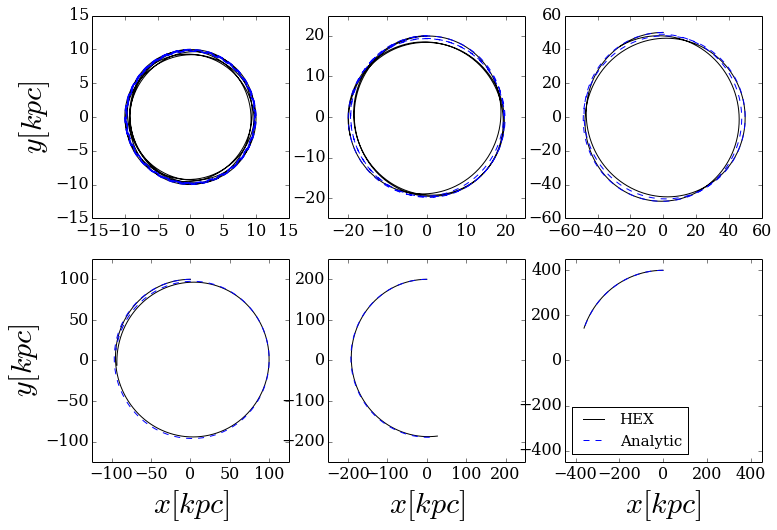

In [73]:
figure(figsize=(12, 8))

subplot(2, 3, 1)
plot(x_hex1, y_hex1, lw=1, c='k', ls='-', label='$HEX$')
plot(x_hern1, y_hern1, lw=1, c='b', ls='--', label='Analytic')
xlim(-15, 15)
ylim(-15, 15)
ylabel('$y[kpc]$', fontsize=30)
#axis('equal')

subplot(2, 3, 2)
plot(x_hex2, y_hex2, lw=1, c='k')
plot(x_hern2, y_hern2, lw=1, c='b', ls='--')
xlim(-25, 25)
ylim(-25, 25)

subplot(2, 3, 3)
plot(x_hex3, y_hex3, lw=1, c='k')
plot(x_hern3, y_hern3, lw=1, c='b', ls='--')
xlim(-60, 60)
ylim(-60, 60)

subplot(2, 3, 4)
plot(x_hex4, y_hex4, lw=1, c='k')
plot(x_hern4, y_hern4, lw=1, c='b', ls='--')
xlim(-125, 125)
ylim(-125, 125)
ylabel('$y[kpc]$', fontsize=30)
xlabel('$x[kpc]$', fontsize=30)



subplot(2, 3, 5)
plot(x_hex5, y_hex5, lw=1, c='k')
plot(x_hern5, y_hern5, lw=1, c='b', ls='--')
xlim(-250, 250)
ylim(-250, 250)
xlabel('$x[kpc]$', fontsize=30)


subplot(2, 3, 6)
plot(x_hex6, y_hex6, lw=1, c='k', label='HEX')
plot(x_hern6, y_hern6, lw=1, c='b', ls='--', label='Analytic')
xlim(-450, 450)
ylim(-450, 450)
legend(loc='best', fontsize=15)
xlabel('$x[kpc]$', fontsize=30)



plt.savefig('MW_orbits_biffn1.png', dpi=300, format='pdf', bbox_inches='tight')


In [45]:
t2_hex1, x2_hex1, y2_hex1, z2_hex1, vx2_hex1, vy2_hex1, vz2_hex1 = leapfrog.integrate_biff(0, 10, 0, 161, 0, 0, 2, SMW2, TMW2, 10, 0, G1.value, 1.55E12, 40.85)
t2_hex2, x2_hex2, y2_hex2, z2_hex2, vx2_hex2, vy2_hex2, vz2_hex2 = leapfrog.integrate_biff(0, 20, 0, 190, 0, 0, 2, SMW2, TMW2, 10, 0, G1.value, 1.55E12, 40.85)
t2_hex3, x2_hex3, y2_hex3, z2_hex3, vx2_hex3, vy2_hex3, vz2_hex3 = leapfrog.integrate_biff(0, 50, 0, 201, 0, 0, 3, SMW2, TMW2, 10, 0, G1.value, 1.55E12, 40.85)
t2_hex4, x2_hex4, y2_hex4, z2_hex4, vx2_hex4, vy2_hex4, vz2_hex4 = leapfrog.integrate_biff(0, 100, 0, 184, 0, 0, 4, SMW2, TMW2, 10, 0, G1.value, 1.55E12, 40.85)
t2_hex5, x2_hex5, y2_hex5, z2_hex5, vx2_hex5, vy2_hex5, vz2_hex5 = leapfrog.integrate_biff(0, 200, 0, 152, 0, 0, 4, SMW2, TMW2, 10, 0, G1.value, 1.55E12, 40.85)
t2_hex6, x2_hex6, y2_hex6, z2_hex6, vx2_hex6, vy2_hex6, vz2_hex6 = leapfrog.integrate_biff(0, 400, 0, 117, 0, 0, 4, SMW2, TMW2, 10, 0, G1.value, 1.55E12, 40.85)

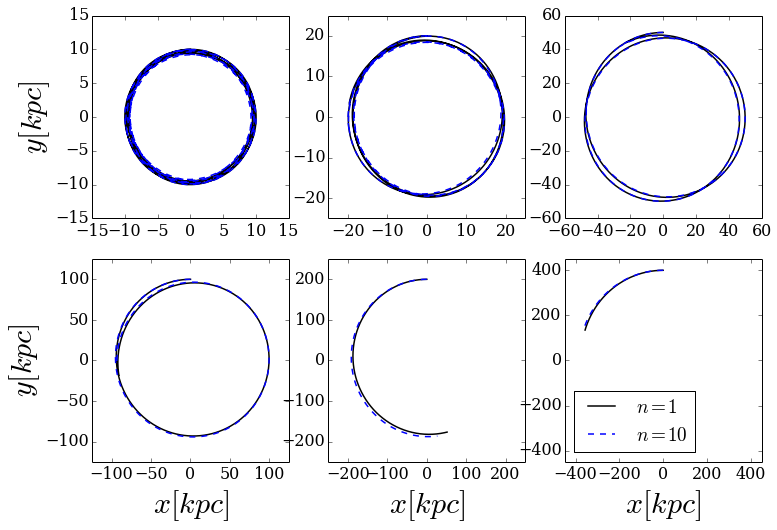

In [72]:
figure(figsize=(12, 8))

subplot(2, 3, 1)
plot(x2_hex1, y2_hex1, lw=1.5, c='k', ls='-')
plot(x_hex1, y_hex1, lw=1.5, c='b', ls='--')
xlim(-15, 15)
ylim(-15, 15)
ylabel('$y[kpc]$', fontsize=30)


subplot(2, 3, 2)
plot(x2_hex2, y2_hex2, lw=1.5, c='k', ls='-')
plot(x_hex2, y_hex2, lw=1.5, c='b', ls='--')
xlim(-25, 25)
ylim(-25, 25)

subplot(2, 3, 3)
plot(x2_hex3, y2_hex3, lw=1.5, c='k', ls='-')
plot(x_hex3, y_hex3, lw=1.5, c='b', ls='--')
xlim(-60, 60)
ylim(-60, 60)

subplot(2, 3, 4)
plot(x2_hex4, y2_hex4, lw=1.5, c='k', ls='-')
plot(x_hex4, y_hex4, lw=1.5, c='b', ls='--')
xlim(-125, 125)
ylim(-125, 125)
xlabel('$x[kpc]$', fontsize=30)
ylabel('$y[kpc]$', fontsize=30)


subplot(2, 3, 5)
plot(x2_hex5, y2_hex5, lw=1.5, c='k', ls='-')
plot(x_hex5, y_hex5, lw=1.5, c='b', ls='--')
xlim(-250, 250)
ylim(-250, 250)
xlabel('$x[kpc]$', fontsize=30)

subplot(2, 3, 6)
plot(x2_hex6, y2_hex6, lw=1.5, c='k', ls='-', label='$n=1$')
plot(x_hex6, y_hex6, lw=1.5, c='b', ls='--', label='$n=10$')
legend(loc='best')
xlim(-450, 450)
ylim(-450, 450)
xlabel('$x[kpc]$', fontsize=30)



plt.savefig('MW_orbits_biffn1n10.png', dpi=300, bbox_inches='tight')

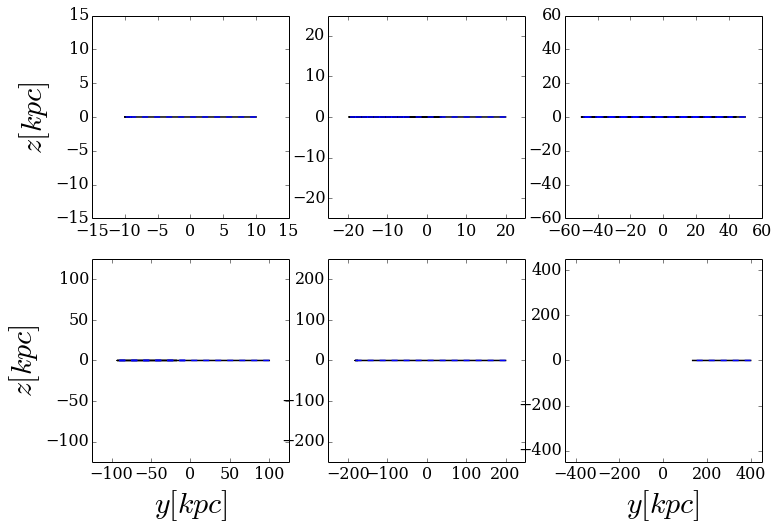

In [74]:
figure(figsize=(12, 8))

subplot(2, 3, 1)
plot(y2_hex1, z2_hex1, lw=1.5, c='k', ls='-')
plot(y_hex1, z_hex1, lw=1.5, c='b', ls='--')
xlim(-15, 15)
ylim(-15, 15)
ylabel('$z[kpc]$', fontsize=30)


subplot(2, 3, 2)
plot(y2_hex2, z2_hex2, lw=1.5, c='k', ls='-')
plot(y_hex2, z_hex2, lw=1.5, c='b', ls='--')
xlim(-25, 25)
ylim(-25, 25)

subplot(2, 3, 3)
plot(y2_hex3, z2_hex3, lw=1.5, c='k', ls='-')
plot(y_hex3, z_hex3, lw=1.5, c='b', ls='--')
xlim(-60, 60)
ylim(-60, 60)

subplot(2, 3, 4)
plot(y2_hex4, z2_hex4, lw=1.5, c='k', ls='-')
plot(y_hex4, z_hex4, lw=1.5, c='b', ls='--')
xlim(-125, 125)
ylim(-125, 125)
xlabel('$y[kpc]$', fontsize=30)
ylabel('$z[kpc]$', fontsize=30)


subplot(2, 3, 5)
plot(y2_hex5, z2_hex5, lw=1.5, c='k', ls='-')
plot(y_hex5, z_hex5, lw=1.5, c='b', ls='--')
xlim(-250, 250)
ylim(-250, 250)
subplot(2, 3, 6)
xlabel('$y[kpc]$', fontsize=30)


plot(y2_hex6, z2_hex6, lw=1.5, c='k', ls='-')
plot(y_hex6, z_hex6, lw=1.5, c='b', ls='--')
xlim(-450, 450)
ylim(-450, 450)
xlabel('$y[kpc]$', fontsize=30)


plt.savefig('MWyz_orbits_biffn1n10.png', dpi=300, bbox_inches='tight')

